In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'

model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v3/bow.simple'
vocab_path = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'

image_model_name='InceptionResnetV2'

image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      model_name=image_model_name,
                                      feature_name=None)
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir, 
                         image_model_name=image_model_name, 
                         image_model=image_model,
                         index=-1)

text_strs = np.load(os.path.join(valid_dir, 'distinct_text_strs.npy'))
img2text = np.load(os.path.join(valid_dir, 'img2text.npy')).item()

tensorflow_version: 1.3.0


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


image_model feature_name is None will get PreLogits
image_feature: Tensor("InceptionResnetV2/Logits/Dropout/Identity:0", shape=(?, 1536), dtype=float32)
build graph for attention features
image_model will get feature_name Conv2d_7b_1x1
image_feature: Tensor("Flatten/Reshape:0", shape=(?, 98304), dtype=float32)


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt
image_model: <melt.image.image_model.ImageModel object at 0x7fed88cc24d0>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/new/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt duration: 5.99558186531
ENCODE_UNK 1


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/ai-challenger/model.v3/bow.simple/model.ckpt-60.72-249000


restore meta grpah and model ok /home/gezi/new/temp/image-caption/ai-challenger/model.v3/bow.simple/model.ckpt-60.72-249000 duration: 1.09335398674


image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg:743e12038dcf7dbc68123ca7dff9d6d66eb09ea1


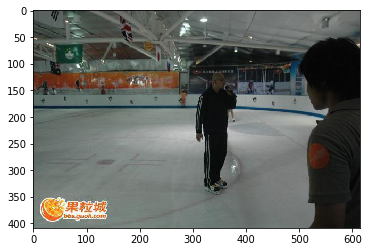

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.311 seconds.
Prefix dict has been built succesfully.


label: 滑冰场上一群人旁有一个戴着眼镜的男人在滑冰 滑冰场 上 一群 人旁 有 一个 戴着 眼镜 的 男人 在 滑冰

label: 滑冰场上一个人旁有一个左手拿着话筒的男人在讲话 滑冰场 上 一个 人旁 有 一个 左手 拿 着 话筒 的 男人 在 讲话

label: 滑冰场上一个男人旁边有一个站着的男人在说话 滑冰场 上 一个 男人 旁边 有 一个 站 着 的 男人 在 说话

label: 溜冰场里一个人前面有一个左手拿着话筒的男人在讲话 溜冰场 里 一个 人 前面 有 一个 左手 拿 着 话筒 的 男人 在 讲话

label: 溜冰场上一个人旁有一个左手拿着话筒的男人在说话 溜冰场 上 一个 人旁 有 一个 左手 拿 着 话筒 的 男人 在 说话

topwords of image:
乘客 0.466819|高铁 0.454089|机场 0.448088|机厢里 0.446889|列车 0.436007|站台 0.431761|候车 0.422377|乘务员 0.421304|地铁站 0.41484|车站里 0.409455|飞机场 0.395431|停机场 0.384355|过 0.379616|人买 0.375835|动车 0.375122|保龄球 0.360078|车库 0.354396|月 0.346807|分开 0.344042|内站 0.343623|空姐 0.337536|登机 0.336337|序 0.335454|溜冰鞋 0.330225|军人 0.32827|保龄球馆 0.326204|里侧 0.324949|物体 0.323345|车站 0.320129|玻璃球 0.317301|车库里 0.313612|篮球馆 0.311773|着墨 0.308686|火车站 0.308131|购买 0.304877|工作人员 0.304599|秩 0.304495|店员 0.303431|世界 0.303008|控制室 0.29663|巴士 0.295939|游轮 0.295268|大巴车 0.294983|礼仪 0.290696|人仰 0.290266|大厅 0.290247|停车库 0.290113|包手 0.289651|展馆 0.289598|隧道 0.288386|
text like 舞台上有一个双手拿着笛子的女人在表演:ac

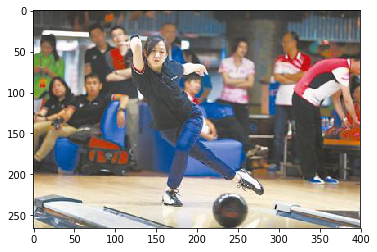

label: 保龄球馆里一群人前面有一个穿着黑色短袖的女人在打保龄球 保龄球馆 里 一群 人 前面 有 一个 穿着 黑色 短袖 的 女人 在 打 保龄球

label: 球馆里一群人前有一个身穿牛仔裤的女人在打保龄球 球馆 里 一群 人前 有 一个 身穿 牛仔裤 的 女人 在 打 保龄球

label: 运动馆里一群人旁边有一个穿着黑色短袖的女人在打保龄球 运动 馆里 一群 人 旁边 有 一个 穿着 黑色 短袖 的 女人 在 打 保龄球

label: 球馆里一群人的前面有一个扎着头发的女人在打保龄球 球馆 里 一群 人 的 前面 有 一个 扎 着 头发 的 女人 在 打 保龄球

label: 场馆里一群人旁边有一个扎着头发的女人在打保龄球 场馆 里 一群 人 旁边 有 一个 扎 着 头发 的 女人 在 打 保龄球

topwords of image:
轮滑鞋 0.363677|代步车 0.362099|调整 0.35427|锻炼 0.349289|比武 0.348796|赛道 0.347853|停车库 0.337844|袋装 0.336878|姿势 0.335175|修鞋 0.334239|锻炼身体 0.328|男子 0.326464|滑冰鞋 0.319391|健身 0.315756|螺丝 0.310341|赛 0.310206|布匹 0.309197|溜冰鞋 0.309015|玩游戏 0.308995|张大嘴巴 0.308316|体验 0.308121|一字 0.307586|运动 0.307564|人身 0.30564|旁脱 0.303164|代步 0.302451|人群 0.300874|筋骨 0.299473|练习 0.299207|里练舞 0.295289|弓着腰 0.293931|敷脚 0.293787|做起 0.29311|残疾人 0.289527|保龄球 0.288737|健身房 0.288279|穿鞋 0.287975|脚尖 0.287824|保龄球馆 0.287443|活动室 0.285665|跪倒 0.285078|螺丝刀 0.284936|岔开 0.283269|轮子 0.282901|一个半 0.282896|冰袋 0.280876|人旁 0.279375|搀扶 0.276949|脚站 0.275646|健身器材 0.275049|


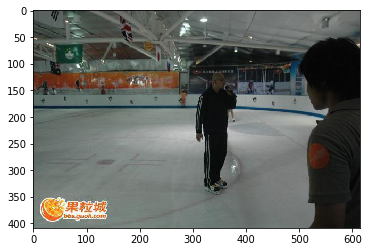

label: 滑冰场上一群人旁有一个戴着眼镜的男人在滑冰 滑冰场 上 一群 人旁 有 一个 戴着 眼镜 的 男人 在 滑冰

label: 滑冰场上一个人旁有一个左手拿着话筒的男人在讲话 滑冰场 上 一个 人旁 有 一个 左手 拿 着 话筒 的 男人 在 讲话

label: 滑冰场上一个男人旁边有一个站着的男人在说话 滑冰场 上 一个 男人 旁边 有 一个 站 着 的 男人 在 说话

label: 溜冰场里一个人前面有一个左手拿着话筒的男人在讲话 溜冰场 里 一个 人 前面 有 一个 左手 拿 着 话筒 的 男人 在 讲话

label: 溜冰场上一个人旁有一个左手拿着话筒的男人在说话 溜冰场 上 一个 人旁 有 一个 左手 拿 着 话筒 的 男人 在 说话

topwords of image:
乘客 0.466819|高铁 0.454089|机场 0.448088|机厢里 0.446889|列车 0.436007|站台 0.431761|候车 0.422377|乘务员 0.421304|地铁站 0.41484|车站里 0.409455|飞机场 0.395431|停机场 0.384355|过 0.379616|人买 0.375835|动车 0.375122|保龄球 0.360078|车库 0.354396|月 0.346807|分开 0.344042|内站 0.343623|空姐 0.337536|登机 0.336337|序 0.335454|溜冰鞋 0.330225|军人 0.32827|保龄球馆 0.326204|里侧 0.324949|物体 0.323345|车站 0.320129|玻璃球 0.317301|车库里 0.313612|篮球馆 0.311773|着墨 0.308686|火车站 0.308131|购买 0.304877|工作人员 0.304599|秩 0.304495|店员 0.303431|世界 0.303008|控制室 0.29663|巴士 0.295939|游轮 0.295268|大巴车 0.294983|礼仪 0.290696|人仰 0.290266|大厅 0.290247|停车库 0.290113|包手 0.289651|展馆 0.289598|隧道 0.288386|
text like 舞台上有一个双手拿着笛子的女人在表演:e2

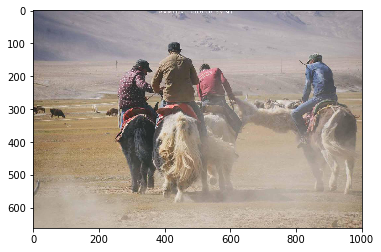

label: 宽阔的草原上有四个戴着帽子的男人骑着牛 宽阔 的 草原 上 有 四个 戴着 帽子 的 男人 骑着 牛

label: 宽阔平坦的草原上有四个男人坐在牛背上 宽阔 平坦 的 草原 上 有 四个 男人 坐在 牛背上

label: 一望无际的草原上有四个人低头骑着牛 一望无际 的 草原 上 有 四个 人 低头 骑着 牛

label: 四个双手拿着缰绳的人骑着牦牛奔跑在辽阔的草原上 四个 双手 拿 着 缰绳 的 人 骑 着 <UNK> 牛 奔跑 在 辽阔 的 草原 上

label: 四个戴着帽子的男人骑着牛奔跑在空旷的草地上 四个 戴着 帽子 的 男人 骑着 牛 奔跑 在 空旷 的 草地 上

topwords of image:
狗拉着 0.536493|羊群 0.522849|麋鹿 0.512502|羊圈 0.436159|牛旁 0.433522|羊腿 0.427113|牛群 0.425998|一群 0.425871|四位 0.402404|牵马 0.401354|们 0.400958|五个 0.397322|驴子 0.392711|七个 0.390853|四个 0.387134|群 0.384162|熙熙攘攘 0.3835|盲人 0.38129|小牛 0.37771|五 0.37732|两头 0.373306|人来人往 0.373161|人群 0.371816|羊站 0.370904|雪橇 0.370537|六个 0.369253|四 0.367024|三个 0.361373|羊 0.360326|雪橇犬 0.356863|八 0.355874|小羊 0.352171|三位 0.351904|三名 0.351673|四名 0.348017|八个 0.344853|群中 0.344011|两只 0.343465|喂鸡 0.341927|热闹 0.340864|七 0.337789|然 0.337493|逗狗 0.336482|赶猪 0.336469|挤奶 0.332402|三 0.330852|几个 0.330152|放羊 0.328968|牛车上 0.326768|旁边 0.324733|
text like 舞台上有一个双手拿着笛子的女人在表演:f0fe60d0ebb9447e6f949cbf6f8af5ab5d20a39d
<UNK>
sim:

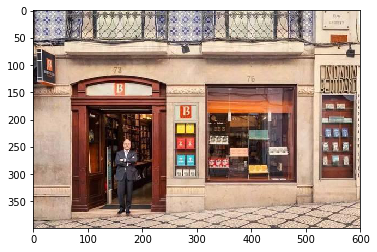

label: 干净的店门口站着一个双手抱臂的男人 干净 的 店门口 站 着 一个 双手 抱臂 的 男人

label: 一个双手抱臂的男人站在整洁的商店门口 一个 双手 抱臂 的 男人 站 在 整洁 的 商店 门口

label: 琳琅满目的商店前站着一位双手环抱的男士 琳琅满目 的 商店 前站 着 一位 双手 环抱 的 男士

label: 一个双手抱在胸前的男人站在商店门口 一个 双手 抱 在 胸前 的 男人 站 在 商店 门口

label: 一个双手抱胸的男人站在干净的商店门口 一个 双手 抱 胸 的 男人 站 在 干净 的 商店 门口

topwords of image:
选书 0.537411|小店 0.473255|报亭 0.426242|店门口 0.42051|药店 0.419344|小巷子 0.404587|书房 0.398004|书局 0.395842|书店 0.393375|小巷 0.387159|浇树 0.382633|楼下 0.382262|挑书 0.380713|念 0.38032|图书 0.378291|银行 0.366511|书籍 0.359777|包链 0.348853|奶茶 0.34525|五金店 0.334538|抚 0.332311|小卖部 0.33031|书架上 0.328099|楼房 0.32796|书橱 0.327271|商铺 0.324072|礼堂 0.32381|图书管 0.322158|书柜 0.322076|橱窗 0.32043|宠物店 0.313664|书摊 0.311132|屋外 0.311109|套袖 0.309386|杂货店 0.307865|入口处 0.307402|店 0.306867|店外 0.303769|货柜 0.302925|雄伟 0.299867|巷子 0.299614|街边 0.299434|竹制品 0.298208|档案袋 0.296744|找钱 0.295403|蛋糕店 0.294523|图书室 0.292639|熟食店 0.291942|冥币 0.289427|建筑物 0.288884|
text like 舞台上有一个双手拿着笛子的女人在表演:男人
男人
sim: [[ 0.03479356]]
text like 舞台上有一个双手拿着笛子的女人在表演:女人
女人
sim: [[

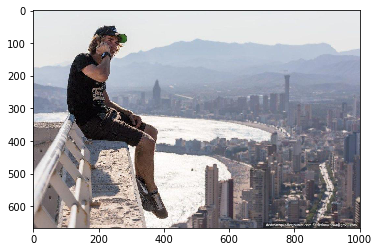

label: 一个戴着帽子的男人坐在屋顶上打电话 一个 戴着 帽子 的 男人 坐在 屋顶 上 打电话

label: 天台上有一个戴着帽子的男人坐在护栏上打电话 天 台上 有 一个 戴着 帽子 的 男人 坐在 护栏 上 打电话

label: 一个戴着帽子的人坐在屋顶上打电话 一个 戴着 帽子 的 人 坐在 屋顶 上 打电话

label: 天台上一个在打电话的男人坐在石阶上 天 台上 一个 在 打电话 的 男人 坐在 石阶 上

label: 天台上有一个戴着帽子的男人在打电话 天 台上 有 一个 戴着 帽子 的 男人 在 打电话

topwords of image:
天 0.555184|威亚 0.472575|楼顶上 0.467595|木道 0.435218|露台 0.429515|高楼 0.412775|天台 0.411649|蓝天白云 0.408905|护栏 0.406378|天空 0.401639|大楼 0.400903|半空中 0.384266|楼顶 0.373483|湖 0.373398|围栏 0.367613|爬山 0.365946|望远镜 0.361091|高 0.358123|木栏 0.356292|桥 0.353633|跳远 0.351641|桥上 0.348477|江边 0.346891|房顶 0.346872|悠长 0.343063|围墙 0.339549|顶上 0.338594|垒球 0.337159|后空翻 0.336543|吊着 0.335324|风力 0.334415|滑沙 0.333984|山边 0.332728|电 0.332007|远方 0.326698|风景 0.326676|走钢丝 0.325506|铁锨 0.324753|蓝天 0.324626|山顶 0.322189|起 0.320453|爬楼梯 0.319836|雄伟 0.319819|空中 0.319718|冲向 0.318692|海岸边 0.31861|栈道 0.31795|蹦极 0.317426|钢架 0.314004|扔球 0.312587|


In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg:')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  plt.subplot(1, 1, 1)
  image_show(image_path)

  try:
    hits = img2text[image_name]
    texts = [text_strs[hit] for hit in hits]
    for text in texts:
      word_ids = text2ids.text2ids(text)
      seg_text = text2ids.ids2text(word_ids, print_end=False)
      print('label:', text, seg_text)
      words_importance = predictor.words_importance([word_ids])
      words_importance = words_importance[0]
      for i in range(len(word_ids)):
        if word_ids[i] == 0:
          break 
      print()
  except Exception:
    print(traceback.format_exc(), file=sys.stderr)    
    pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 50)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  for word_id, score in zip(word_ids, scores):
    print(vocab.key(int(word_id)), score, end='|')
  print()

  while True:
    text = raw_input('text like 舞台上有一个双手拿着笛子的女人在表演:')
    if text is 'q':
      break
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))